## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  
a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#len of dataframe
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
#the unique datadrame values in every column
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
p_con=df.converted.mean()
print("The proportion of users converted: "+str( p_con))

The proportion of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:

treat_not_new=len(df[(df.group=='treatment')&(df.landing_page!='new_page')])
print("The number of times the new_page and treatment don't line up  "+str(treat_not_new))

The number of times the new_page and treatment don't line up  1965


f. Do any of the rows have missing values?

In [7]:
#is their is a null value in he dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#get a copy of the main dataframe
df2=df.copy()

In [9]:
#get the index of the false data 
list_false_raws=df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index
print("the indeces of false data :  ")
list_false_raws

the indeces of false data :  


Int64Index([    22,    240,    308,    327,    357,    490,    685,    713,
               776,    846,
            ...
            293817, 293888, 293894, 293917, 293996, 294014, 294200, 294252,
            294253, 294331],
           dtype='int64', length=3893)

In [10]:
#drop those indeces
df2.drop(index=list_false_raws,axis=0,inplace=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
#the number of unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#the maximum repeated user id 
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset=['user_id'],inplace=True)

In [17]:
#check the len of df 
len(df2)

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [19]:
#the probablity of converting regardless the page
P_con=df2.converted.mean()
P_con

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
PC_con=df2.query('group=="control"').converted.mean()
PC_con

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
PT_con=df2.query('group=="treatment"').converted.mean()
PT_con

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
P_newPage=(df2.landing_page=='new_page').mean()
P_newPage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**I don't think their is a sufficient evidence that proves the new treatment leads
to more conversions as they both nearly are gives the same probablity.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

null : P_new is worse than or equal P_old<br>
alternative: P_new is better than P_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [23]:
#the probablity of the new page that is converted in actual data
P_new_con=df2.query('landing_page=="new_page"').converted.mean()
P_new_con

0.11880806551510564

In [24]:
#the probablity of the old page that is converted in actual data
P_old_con=df2.query('landing_page=="old_page"').converted.mean()
P_old_con

0.1203863045004612

In [25]:
#the difference in the probablity to get the obs diff
obs_diff=P_new_con-P_old_con
obs_diff

-0.0015782389853555567

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
#result of the above assumsion then Pconverting=Pnew=Pold
#p_con is equal to the converted rate regardless of the type of the page
Pnew=P_con
Pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
#Pconverting=Pnew=Pold
# as above
Pold=P_con
Pold

0.11959708724499628

In [28]:
# the difference under the null
Pdiff_null=Pnew-Pold
Pdiff_null

0.0

c. What is $n_{new}$?

In [29]:
#the num of the user in new page
n_new=df2.query('landing_page=="new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [30]:
# the num of users in old page
n_old=df2.query('landing_page=="old_page"').user_id.count()
n_old

145274

In [31]:
# the converted rate and the 1-converted rate
P_con,1-P_con

(0.11959708724499628, 0.8804029127550037)

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
#simulation for new page converted
new_page_converted=np.random.choice([1, 0], n_new, p=[P_con,1-P_con])
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
#simulation for old page converted
old_page_converted=np.random.choice([1, 0], n_old, p=[P_con,1-P_con])
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
#the converted rate  for the simulated sample
P_new_converted=new_page_converted.mean()
P_old_converted=old_page_converted.mean()

print(str(P_new_converted),str(P_old_converted)+"\n")
print("𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 for your simulated values")
P_new_converted - P_old_converted

0.11997797811575253 0.11938130704737256

𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 for your simulated values


0.0005966710683799753

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
#simulate 10000 sample
p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.choice([1, 0], n_new, p=[P_con,1-P_con])
    old_page_converted=np.random.choice([1, 0], n_old, p=[P_con,1-P_con])
    P_new_converted=new_page_converted.mean()
    P_old_converted=old_page_converted.mean()
    newDiff=P_new_converted-P_old_converted
    p_diffs.append(newDiff)   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [36]:
# convert to numpy array
p_diffs = np.array(p_diffs)

In [37]:
#the rate for the P_diffs array
rate_diff=p_diffs.mean()
rate_diff

7.743909629720516e-06

In [38]:
#std for diffs
std_diff=np.std(p_diffs)
std_diff

0.001193723687663883

In [39]:
obs_diff,rate_diff

(-0.0015782389853555567, 7.743909629720516e-06)

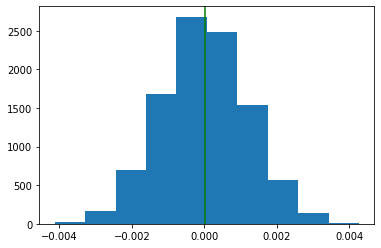

In [40]:
# plot sampling distribution
plt.hist(p_diffs);
plt.axvline(rate_diff, c='green')

In [41]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

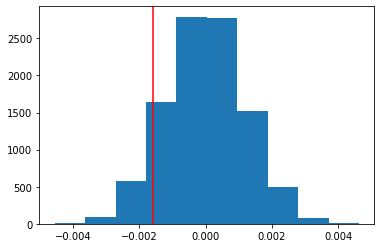

In [42]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
# compute p value
prop_great_than=(null_vals > obs_diff).mean()
prop_great_than

0.9055

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

that the convertion of the new page is more than the old page which tell us that the old page is better than the new page 
and the 0.90>0.05 which mean we fail to reject our null hypothesis 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
import statsmodels.api as sm


In [45]:
#the number of conversions for each page
convert_old=df2.query('landing_page=="old_page" & converted=="1"').count()[0]
convert_new =df2.query('landing_page=="new_page" & converted=="1"').count()[0]
# the number of individuals who received each page
n_old = df2.query('landing_page=="old_page"').user_id.count()
n_new = df2.query('landing_page=="new_page"').user_id.count()
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], 
                                              nobs=[n_new, n_old])
z_score, p_value

(-1.3109241984234394, 0.18988337448195103)

In [47]:
z_score_diffs=np.std(p_diffs)
z_score_diffs

0.001193723687663883

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

the p_value in the previous is 0.90 and now is 0.19 and z_score is the standard dervision of the pervious which is also not true as z_score is the std of the previous distribution whicjh is 0.00119 so it is also does not agree

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [49]:
#create the intercept 
df2['intercept'] = 1

In [50]:
#create the dummy variables
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [51]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:               8.077e-06
Time:                        09:48:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

# p-value associated with ab_page = 0.190

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

# it can make the prediction of the regression model better and the disadvantage is that it will make it complex and it may be not converage 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [54]:
#the unique values of country
df_new.country.nunique()

3

In [55]:
#the value counts of country
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [56]:
#the dummy variables
df_new[['us','uk','ca']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,us,uk,ca
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [57]:
#drop the third of the dummy variables of the country
df_new.drop('ca',axis=1,inplace=True)

In [58]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,us,uk
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [59]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 9 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
us              290584 non-null uint8
uk              290584 non-null uint8
dtypes: int64(2), object(4), uint8(3)
memory usage: 16.4+ MB


In [60]:
#the converting rate of country us
p_us_con=df_new.query('us=="1"').converted.mean()
p_us_con

0.11531829781364232

In [61]:
#the converting rate of country uk
p_uk_con=df_new.query('uk=="1"').converted.mean()
p_uk_con

0.12059448568984076

In [62]:
#the converting rate of country ca
p_ca_con=1-(p_us_con+p_uk_con)
p_ca_con

0.7640872164965169

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [63]:
#fit the model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','us','uk']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [64]:
#the summery
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:               2.323e-05
Time:                        09:48:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
us            -0.0408      0.027     -1.516      0.130      -0.093       0.012
uk             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.